# Model Comparison

In this notebook we will create several new subreddit prediction models and systematically compare them.

While looking at new models we want to answer the following questions:
- What auxiliary information is important?
- Are different tokenizers better?
- How many words are needed in our Bag-of-Words?
- Do different classification algorithms (XGBoost, Support Vector Machine, Multinomial Logistic Regression, Random Forest)?
- Do more advanced embedding algorithms such as Averaged Word2Vec or Doc2Vec work better?

In order to make this process smoother, I have created custom classes which will hold the models and the results of our progress. These classes are defined in a seperate notebook which will be periodically updating while I'm working on this notebook. Because of this I will define an UPDATE function which will update objects of the main class. This will also include loading previously recorded data.

In [273]:
import pandas as pd

df_raw = pd.read_csv('reddit_data.csv')
df_raw

,id,title,subreddit
0,t93ec3,This subreddit is closed for new posts and com...,announcements
1,pg006s,COVID denialism and policy clarifications,announcements
2,pbmy5y,"Debate, dissent, and protest on Reddit",announcements
3,nw2hs6,Sunsetting Secret Santa and Reddit Gifts,announcements
4,mi01fg,Second,announcements
...,...,...,...
9456,10mvmxu,WIBTA if I planned and threw a St. Patty’s par...,AmItheAsshole
9457,10mvlnr,AITA for lashing out at my parents?,AmItheAsshole
9458,10mvlgl,AITA for not wanting to spend time with my wif...,AmItheAsshole
9459,10mvix4,WIBTA if I cancelled a vacation weekend becaus...,AmItheAsshole


New we need to run our classes notebook and instantiate an object

In [274]:
#Run the other Notebook
%run Classes.ipynb

#Instantiate a new object and load the Reddit Data
new_obj = Subreddit_Predictor()
new_obj.add_data(df_raw)
new_obj.ready_data()

Next lets load the already defined data

In [275]:
#Load the Results Data from the Naive model and the Human Guessing `model'
with open ("human_results.pkl", 'rb') as f:
    data = pkl.load(f)
new_obj.Results.loc['Human'] = data

with open ("naive_results.pkl", 'rb') as f:
    data = pkl.load(f)
new_obj.Results.loc['Naive'] = data

with open ("naive_results_mean.pkl", 'rb') as f:
    data = pkl.load(f)
new_obj.Cross_Validation_Results_avg.loc['Naive'] = data

with open ("naive_results_std.pkl", 'rb') as f:
    data = pkl.load(f)
new_obj.Cross_Validation_Results_std.loc['Naive'] = data

To make things a little easier, we will define some helper functions

In [ ]:
pickleable_attrs = ['raw_data', 'full_data', 'subreddits', 'X_train', 'Y_train', 'X_test', 'Y_test', 'Feature_Vectors',
                    'Models_info', '_le', '_train_index', '_test_index', 'Predictions', 'Results',
                    'Cross_Validation_Results', 'Cross_Validation_Results_avg', 'Cross_Validation_Results_std',
                    'ErrorBars', 'ALL_FEATURES']
nonpickleable_attrs = ['Classifiers', 'Models']


def SAVE_obj(obj, path):
    # Create a dictionary of the object's attributes
    obj_dict = {}
    for attr in pickleable_attrs:
        obj_dict[attr] = obj.__dict__[attr]

    # Save the dictionary to a file
    with open(path, 'wb') as f:
        pkl.dump(obj_dict, f)


def UPDATE_obj(obj, path):
    #Run the other Notebook
    % run Classes.ipynb

    #Instantiate a new object and load the Reddit Data
    new_obj = Subreddit_Predictor()

    # Save the attributes of the old object to a dictionary
    obj_dict = {}
    for attr in pickleable_attrs:
        obj_dict[attr] = obj.__dict__[attr]
        new_obj.__dict__[attr] = obj.__dict__[attr]

    SAVE_obj(new_obj, path)

    for attr in nonpickleable_attrs:
        new_obj.__dict__[attr] = obj.__dict__[attr]

    return new_obj


def LOAD_obj(path):
    # Load the dictionary from a file
    with open(path, 'rb') as f:
        obj_dict = pkl.load(f)

    # Instantiate a new object
    new_obj = Subreddit_Predictor()

    # Add the attributes from the dictionary to the new object
    for attr, value in obj_dict.items():
        new_obj.__dict__[attr] = value

    return new_obj


In [157]:
import pandas as pd
import pickle as pkl
import os

def UPDATE(obj = False):
    """
    This returns an object of the Subreddit_Predictor class. The object already has the relavent data loaded on in. If an object is passed into the UPDATE function, then the data in the obj.Models and obj.Models_info will be coppied into the new object.
    """

    #Load the Reddit Data
    df_raw = pd.read_csv('reddit_data.csv')

    #Run the other Notebook
    %run Classes.ipynb

    #Instantiate a new object and load the Reddit Data
    new_obj = Subreddit_Predictor()
    new_obj.add_data(df_raw)
    new_obj.ready_data()

    #Load the Results Data from the Naive model and the Human Guessing `model'
    with open ("human_results.pkl", 'rb') as f:
        data = pkl.load(f)
    new_obj.Results.loc['Human'] = data

    with open ("naive_results.pkl", 'rb') as f:
        data = pkl.load(f)
    new_obj.Results.loc['Naive'] = data

    with open ("naive_results_mean.pkl", 'rb') as f:
        data = pkl.load(f)
    new_obj.Cross_Validation_Results_avg.loc['Naive'] = data

    with open ("naive_results_std.pkl", 'rb') as f:
        data = pkl.load(f)
    new_obj.Cross_Validation_Results_std.loc['Naive'] = data

    if os.path.exists("ALL_FEATURES.pkl"):
        with open("ALL_FEATURES.pkl", 'rb') as f:
            data = pkl.load(f)
        new_obj.ALL_FEATURES = data
    else:
        print(f"File ALL_FEATURES.pkl does not exist.")

    #Load the Models and Models_info
    if obj:
        new_obj.Models = obj.Models
        new_obj.Models_info = obj.Models_info

    return new_obj

In [158]:
new_obj = UPDATE()

File ALL_FEATURES.pkl does not exist.


In [161]:
new_obj.Cross_Validation_Results_std

,announcements,funny,AskReddit,dataisbeautiful,Awww,datascience,pics,science,worldnews,videos,AmItheAsshole,Total
Model,,,,,,,,,,,,
Naive,0.089083,0.031715,0.015738,0.027367,0.03744,0.037809,0.042773,0.037464,0.027039,0.024318,0.003079,0.012883


In [129]:
import pandas as pd

#df = pd.read_csv('reddit_data.csv').set_index('id')
df_raw = pd.read_csv('reddit_data.csv')#.set_index('id')

df_raw

,id,title,subreddit
0,t93ec3,This subreddit is closed for new posts and com...,announcements
1,pg006s,COVID denialism and policy clarifications,announcements
2,pbmy5y,"Debate, dissent, and protest on Reddit",announcements
3,nw2hs6,Sunsetting Secret Santa and Reddit Gifts,announcements
4,mi01fg,Second,announcements
...,...,...,...
9456,10mvmxu,WIBTA if I planned and threw a St. Patty’s par...,AmItheAsshole
9457,10mvlnr,AITA for lashing out at my parents?,AmItheAsshole
9458,10mvlgl,AITA for not wanting to spend time with my wif...,AmItheAsshole
9459,10mvix4,WIBTA if I cancelled a vacation weekend becaus...,AmItheAsshole



## Classes

In order to improve the results I need to test a lot of models. In a separate notebook I've created three classes to help with that. This will organize the information better.

In [79]:
%run Classes.ipynb

We now have to instantiate our object, load the raw data into our object, and load any previously stored data into out object

In [80]:
obj = Subreddit_Predictor()
obj.add_data(df_raw)
obj.ready_data()

import pickle as pkl

with open ("human_results.pkl", 'rb') as f:
    data = pkl.load(f)
obj.Results.loc['Human'] = data

with open ("naive_results.pkl", 'rb') as f:
    data = pkl.load(f)
obj.Results.loc['Naive'] = data

with open ("naive_results_mean.pkl", 'rb') as f:
    data = pkl.load(f)
obj.Cross_Validation_Results_avg.loc['Naive'] = data

with open ("naive_results_std.pkl", 'rb') as f:
    data = pkl.load(f)
obj.Cross_Validation_Results_std.loc['Naive'] = data

These results represent the Individual Recall Scores and the Total Accuracy Score of attempting the classify subreddits by hand, "Human", and using a naive Bag-of-Words with Random Forrest modle, "Naive".

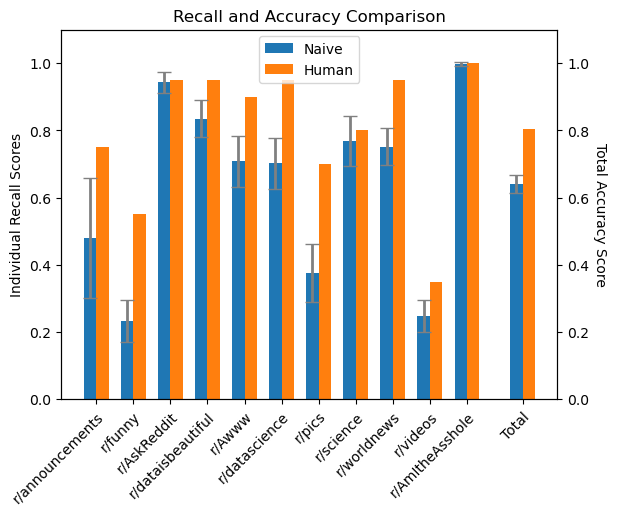

In [83]:
obj.compare([ 'Naive', 'Human'], error_bars=True)

## Feature Engineering

We now need to create a single DataFrame that contains all of the possible features we can extract from this text.

In [84]:
obj.ALL_FEATURES = obj.full_data.copy()

In [85]:
import re

df = obj.ALL_FEATURES.copy()

df['Aux: num_chars'] = df['title'].apply(lambda x: len(x))
df['Aux: num_caps'] =df['title'].apply(lambda s: len(re.findall(r'[A-Z]', s)))
df['Aux: num_lower'] = df['title'].apply(lambda s: len(re.findall(r'[a-z]', s)))
df['Aux: num_emojis'] = df['title'].apply(lambda s: len(re.findall(
        r'[\u2600-\u27bf]' # Miscellaneous Symbols and Pictographs (☀️, 🌁, 🌊)
        r'|[\U0001f300-\U0001f5ff]' # Emoticons (🌞, 🌝, 🌚)
        r'|[\U0001f600-\U0001f64f]' # Transport and Map Symbols (🚗, 🚕, 🚆)
        r'|[\U0001f680-\U0001f6ff]' # Transport and Map Symbols (🚁, 🚲, 🛴)
        r'|[\u2b00-\u2bff]' # Additional emoticons (⬛, ❤️, 🔥)
        , s)))

obj.ALL_FEATURES = df
obj.ALL_FEATURES

,title,subreddit,subreddit_num,Aux: num_chars,Aux: num_caps,Aux: num_lower,Aux: num_emojis
id,,,,,,,
t93ec3,This subreddit is closed for new posts and com...,announcements,3,160,4,125,0
pg006s,COVID denialism and policy clarifications,announcements,3,41,5,32,0
pbmy5y,"Debate, dissent, and protest on Reddit",announcements,3,38,2,29,0
nw2hs6,Sunsetting Secret Santa and Reddit Gifts,announcements,3,40,5,30,0
mi01fg,Second,announcements,3,6,1,5,0
...,...,...,...,...,...,...,...
10mvmxu,WIBTA if I planned and threw a St. Patty’s par...,AmItheAsshole,0,115,8,84,0
10mvlnr,AITA for lashing out at my parents?,AmItheAsshole,0,35,4,24,0
10mvlgl,AITA for not wanting to spend time with my wif...,AmItheAsshole,0,65,4,48,0


In [86]:
from collections import Counter


# Create a list of all characters in the title column

training = pd.DataFrame(obj.X_train)

all_characters = ''.join(training['title'])
total_chars = len(all_characters)

# Create a Counter object to count the occurrences of each word
character_count = Counter(all_characters)
# Create a list of words that appear more than 100 times
infrequent_chars = [char for char, count in character_count.items() if ((count < total_chars/100) & (count > 10))]
#infrequent_chars = [char for char, count in character_count.items() if (count > 10)]

# Print the list of frequent words
print(infrequent_chars)

['W', 'b', '?', 'N', 'O', 'T', 'V', '.', 'L', 'v', "'", '9', '1', '0', 'A', 'I', 'D', 'z', '&', 'M', 'Y', '-', 'S', 'k', '[', 'j', ']', ',', 'x', '’', 'K', '(', ')', 'P', '8', 'C', 'R', '/', '6', ':', 'U', 'F', '2', '4', 'E', 'B', 'X', 'G', '3', '$', '5', 'q', '|', 'H', '#', '%', 'J', '—', '😍', '!', '…', '‘', '7', '"', 'Q', '“', '”', 'Z', '–', '♥', '️', '🤣', 'é', '😂', '🥰', '❤', '+', ';', '*', 'ا', '=', '█']


In [87]:
df = obj.ALL_FEATURES.copy()

new_cols = {'BoC: ' + str(char): df['title'].apply(lambda x: x.count(char)) for char in infrequent_chars}
df = pd.concat([df, pd.DataFrame(new_cols)], axis = 1)


obj.ALL_FEATURES = df
obj.ALL_FEATURES

,title,subreddit,subreddit_num,Aux: num_chars,Aux: num_caps,Aux: num_lower,Aux: num_emojis,BoC: W,BoC: b,BoC: ?,...,BoC: é,BoC: 😂,BoC: 🥰,BoC: ❤,BoC: +,BoC: ;,BoC: *,BoC: ا,BoC: =,BoC: █
id,,,,,,,,,,,,,,,,,,,,,
t93ec3,This subreddit is closed for new posts and com...,announcements,3,160,4,125,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
pg006s,COVID denialism and policy clarifications,announcements,3,41,5,32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pbmy5y,"Debate, dissent, and protest on Reddit",announcements,3,38,2,29,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
nw2hs6,Sunsetting Secret Santa and Reddit Gifts,announcements,3,40,5,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mi01fg,Second,announcements,3,6,1,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10mvmxu,WIBTA if I planned and threw a St. Patty’s par...,AmItheAsshole,0,115,8,84,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10mvlnr,AITA for lashing out at my parents?,AmItheAsshole,0,35,4,24,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10mvlgl,AITA for not wanting to spend time with my wif...,AmItheAsshole,0,65,4,48,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def clean_data(df):
    """
    :param df: Pandas DataFrame with a column 'title'
    :return: original df with the contents of the 'title' column altered. All lowercase. Replace "[oc]", "(oc)", and "[nsfw]" with "_oc_" and "_nsfw_" respectively.
    """

    df['title'] = df['title'].apply(lambda s: s.lower())

    df['title'] = df['title'].apply(lambda s: s.replace("[oc]", "_oc_"))
    df['title'] = df['title'].apply(lambda s: s.replace("(oc)", "_oc_"))
    df['title'] = df['title'].apply(lambda s: s.replace("[nsfw]", "_nsfw_"))
    df['title'] = df['title'].apply(lambda s: s.replace("(nsfw)", "_nsfw_"))
    df['title'] = df['title'].apply(lambda s: s.replace("[wip]", "_wip_"))
    df['title'] = df['title'].apply(lambda s: s.replace("(wip)", "_wip_"))

    return df

In [90]:
import nltk

df = clean_data(obj.ALL_FEATURES)

df['title_tokens'] = df['title'].apply(nltk.word_tokenize)

obj.ALL_FEATURES = df
obj.ALL_FEATURES

,title,subreddit,subreddit_num,Aux: num_chars,Aux: num_caps,Aux: num_lower,Aux: num_emojis,BoC: W,BoC: b,BoC: ?,...,BoC: 😂,BoC: 🥰,BoC: ❤,BoC: +,BoC: ;,BoC: *,BoC: ا,BoC: =,BoC: █,title_tokens
id,,,,,,,,,,,,,,,,,,,,,
t93ec3,this subreddit is closed for new posts and com...,announcements,3,160,4,125,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[this, subreddit, is, closed, for, new, posts,..."
pg006s,covid denialism and policy clarifications,announcements,3,41,5,32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[covid, denialism, and, policy, clarifications]"
pbmy5y,"debate, dissent, and protest on reddit",announcements,3,38,2,29,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[debate, ,, dissent, ,, and, protest, on, reddit]"
nw2hs6,sunsetting secret santa and reddit gifts,announcements,3,40,5,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[sunsetting, secret, santa, and, reddit, gifts]"
mi01fg,second,announcements,3,6,1,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[second]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10mvmxu,wibta if i planned and threw a st. patty’s par...,AmItheAsshole,0,115,8,84,0,1,0,1,...,0,0,0,0,0,0,0,0,0,"[wibta, if, i, planned, and, threw, a, st., pa..."
10mvlnr,aita for lashing out at my parents?,AmItheAsshole,0,35,4,24,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[aita, for, lashing, out, at, my, parents, ?]"
10mvlgl,aita for not wanting to spend time with my wif...,AmItheAsshole,0,65,4,48,0,0,1,1,...,0,0,0,0,0,0,0,0,0,"[aita, for, not, wanting, to, spend, time, wit..."


In [109]:
from nltk.probability import FreqDist

def get_vocab(corpus, tokenizer=nltk.word_tokenize, num_words=False, min_frequency=2):
    """
    :param corpus: a Pandas Series, or other iterable of cleaned text sentences.
    :param tokenizer: a function that takes in a sentence and outputs a list of tokens in that sentence.
    :param num_words: If an integer is given, then this is the max number of words in the vocab.
    :param min_frequency: If an integer is given, then this is the minimum number of times a word must appear in the corpus to be included in the vocab
    :return: A list of all of the tokens in our vocab.
    """
    tokenized_corpus = [tokenizer(corpus.loc[id]['title']) for id in corpus.index]
    flat_list = [word for sublist in tokenized_corpus for word in sublist]
    freq_dist = FreqDist(flat_list)
    vocab = [word for word, freq in freq_dist.items() if freq >= min_frequency]
    if num_words:
        vocab = sorted(vocab, key=lambda x: freq_dist[x], reverse=True)
        vocab = vocab[:min(num_words, len(vocab))]
    vocab.sort()
    return vocab

In [111]:
from tqdm import tqdm

training = clean_data(training)
vocab = get_vocab(training)

df = obj.ALL_FEATURES.copy()
new_cols = {'BoW: ' + word: df['title_tokens'].apply(lambda x: Counter(x)[word]) for word in tqdm(vocab)}
new_df = pd.concat([df, pd.DataFrame(new_cols)], axis=1)
obj.ALL_FEATURES = new_df

obj.ALL_FEATURES

100%|██████████| 6401/6401 [01:48<00:00, 59.04it/s]


,title,subreddit,subreddit_num,Aux: num_chars,Aux: num_caps,Aux: num_lower,Aux: num_emojis,BoC: W,BoC: b,BoC: ?,...,BoW: 😍💕,BoW: 😍😍,BoW: 😍😍😍,BoW: 😴,BoW: 🙏,BoW: 🤣,BoW: 🥰,BoW: 🥹,BoW: 🥺,BoW: 🧡
id,,,,,,,,,,,,,,,,,,,,,
t93ec3,this subreddit is closed for new posts and com...,announcements,3,160,4,125,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
pg006s,covid denialism and policy clarifications,announcements,3,41,5,32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pbmy5y,"debate, dissent, and protest on reddit",announcements,3,38,2,29,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
nw2hs6,sunsetting secret santa and reddit gifts,announcements,3,40,5,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mi01fg,second,announcements,3,6,1,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10mvmxu,wibta if i planned and threw a st. patty’s par...,AmItheAsshole,0,115,8,84,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10mvlnr,aita for lashing out at my parents?,AmItheAsshole,0,35,4,24,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10mvlgl,aita for not wanting to spend time with my wif...,AmItheAsshole,0,65,4,48,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [126]:
from nltk import pos_tag

df = obj.ALL_FEATURES.copy()

df['pos_tokens'] = df['title_tokens'].apply(lambda x: pos_tag(x))

# Get the list of unique parts of speech
pos_tags = list(set([tag for tokens in df['pos_tokens'] for word, tag in tokens]))

# Add a new column for each part of speech
for pos in tqdm(pos_tags):
    df['PoS: ' + str(pos)] = df['pos_tokens'].apply(lambda x: len([word for word, tag in x if tag == pos]))

obj.ALL_FEATURES = df
obj.ALL_FEATURES


,title,subreddit,subreddit_num,Aux: num_chars,Aux: num_caps,Aux: num_lower,Aux: num_emojis,BoC: W,BoC: b,BoC: ?,...,PoS: VBP,PoS: JJ,PoS: VB,PoS: VBG,PoS: SYM,PoS: NNPS,PoS: .,PoS: ),"PoS: ,",PoS: WRB
id,,,,,,,,,,,,,,,,,,,,,
t93ec3,this subreddit is closed for new posts and com...,announcements,3,160,4,125,0,0,1,0,...,0,2,2,0,0,0,2,0,3,0
pg006s,covid denialism and policy clarifications,announcements,3,41,5,32,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
pbmy5y,"debate, dissent, and protest on reddit",announcements,3,38,2,29,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0
nw2hs6,sunsetting secret santa and reddit gifts,announcements,3,40,5,30,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
mi01fg,second,announcements,3,6,1,5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10mvmxu,wibta if i planned and threw a st. patty’s par...,AmItheAsshole,0,115,8,84,0,1,0,1,...,0,1,1,0,0,0,1,0,0,0
10mvlnr,aita for lashing out at my parents?,AmItheAsshole,0,35,4,24,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
10mvlgl,aita for not wanting to spend time with my wif...,AmItheAsshole,0,65,4,48,0,0,1,1,...,0,0,1,1,0,0,1,0,0,0


In [125]:


pos_tag(nltk.word_tokenize("Hello, world!")).count(('Hello', ))

0

In [108]:
tokenized_corpus = [nltk.word_tokenize(training.loc[id]['title']) for id in training.index]
tokenized_corpus

[['what',
  'do',
  'you',
  'find',
  'to',
  'be',
  'the',
  'most',
  'disrespectful',
  'subreddit',
  'here',
  '?'],
 ['not', 'gon', 'na', 'eat', 'there'],
 ['very',
  'content',
  'cat',
  '.',
  'loving',
  'the',
  'sun',
  'and',
  'ofcourse',
  'the',
  'heated',
  'cob',
  'bench',
  'does',
  "n't",
  'hurt',
  'either',
  '.'],
 ['9', 'year', 'old', 'drifting', 'a', 'car'],
 ['watchmen', '10'],
 ['lounging', 'out'],
 ['aita',
  'for',
  'telling',
  'my',
  'mother',
  'that',
  'my',
  'sister',
  'has',
  'no',
  'manners'],
 ['daniel',
  'díaz',
  '&',
  'miguel',
  'yanover',
  '-',
  'a',
  'stab',
  'in',
  'the',
  'dark',
  '[',
  'instrumental',
  'dark',
  'jazz',
  ']',
  'electric',
  'bass',
  'guitar',
  ',',
  'electric',
  'piano',
  ',',
  'acoustic',
  'drums',
  ',',
  'tenor',
  'saxophone',
  '.'],
 ['what',
  '’',
  's',
  'the',
  'proper',
  'way',
  'to',
  'respectfully',
  'sign',
  'of',
  'to',
  'comment',
  'after',
  'a',
  'discussion',
 

In [107]:
training.loc['10q4vr2']['title']

'what do you find to be the most disrespectful subreddit here?'

In [110]:
training = clean_data(training)
get_vocab(training)

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'d",
 "'data",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'the",
 "'ve",
 "'war",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '....',
 '.....',
 '/',
 '//',
 '/r/worldnews',
 '0',
 '0.4',
 '000',
 '1',
 '1,000',
 '1-10',
 '1.2',
 '1.5',
 '10',
 '10,000',
 '10-11',
 '100',
 '1000',
 '100k',
 '100m',
 '101',
 '10k',
 '10pm',
 '11',
 '112',
 '12',
 '12-4',
 '13',
 '13th',
 '14',
 '15',
 '150',
 '15th',
 '16',
 '160',
 '18',
 '1880',
 '19',
 '1910',
 '1940',
 '1945',
 '1950s',
 '1960',
 '1970',
 '1970s',
 '1980',
 '1980s',
 '1981-2022',
 '1985',
 '1987',
 '1990',
 '1990s',
 '1991',
 '1993',
 '1995',
 '1996',
 '1998',
 '1am',
 '1k',
 '1st',
 '2',
 '2,000',
 '2.4',
 '20',
 '20,000',
 '200',
 '2000',
 '2001',
 '2003',
 '2007',
 '2008',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2018-2022',
 '2019',
 '2019-2022',
 '2020',
 '2021',
 '2021-2022',
 '2021.',
 '2022',
 '2022.',
 '2023',
 '2024',
 '2026',


In [19]:
df

,title,subreddit,subreddit_num,Aux: num_chars,Aux: num_caps,Aux: num_lower,Aux: num_emojis,title_tokens
id,,,,,,,,
t93ec3,this subreddit is closed for new posts and com...,announcements,3,160,4,125,0,"[this, subreddit, is, closed, for, new, posts,..."
pg006s,covid denialism and policy clarifications,announcements,3,41,5,32,0,"[covid, denialism, and, policy, clarifications]"
pbmy5y,"debate, dissent, and protest on reddit",announcements,3,38,2,29,0,"[debate, ,, dissent, ,, and, protest, on, reddit]"
nw2hs6,sunsetting secret santa and reddit gifts,announcements,3,40,5,30,0,"[sunsetting, secret, santa, and, reddit, gifts]"
mi01fg,second,announcements,3,6,1,5,0,[second]
...,...,...,...,...,...,...,...,...
10mvmxu,wibta if i planned and threw a st. patty’s par...,AmItheAsshole,0,115,8,84,0,"[wibta, if, i, planned, and, threw, a, st., pa..."
10mvlnr,aita for lashing out at my parents?,AmItheAsshole,0,35,4,24,0,"[aita, for, lashing, out, at, my, parents, ?]"
10mvlgl,aita for not wanting to spend time with my wif...,AmItheAsshole,0,65,4,48,0,"[aita, for, not, wanting, to, spend, time, wit..."


### Naive Model+

The first thing we need to do is recreate our Naive Model. The embedding process uses Bag-of-Words. To make our lives easier in the future, we will create a generalized BoW embedding that can be easily modified.


*Cleaning* - Make everythign lower case and fix some common terms like "[oc]" to make it easier for the tokenizer
*Embedding* - "Training" a BoW model is really just creating a vacob list. We use NLTK's tokenizer
*Classifying* - As in our first approach we will use Random Forrest.

In [6]:
def clean_data(df):
    """
    :param df: Pandas DataFrame with a column 'title', or a Series
    :return: original df with the contents of the 'title' column altered. All lowercase. Replace "[oc]", "(oc)", and "[nsfw]" with "_oc_" and "_nsfw_" respectively.
    """

    if type(df) == pd.Series:
        df = pd.DataFrame(df)
        series = True
    else:
        series = False

    df['title'] = df['title'].apply(lambda s: s.lower())

    df['title'] = df['title'].apply(lambda s: s.replace("[oc]", "_oc_"))
    df['title'] = df['title'].apply(lambda s: s.replace("(oc)", "_oc_"))
    df['title'] = df['title'].apply(lambda s: s.replace("[nsfw]", "_nsfw_"))
    df['title'] = df['title'].apply(lambda s: s.replace("(nsfw)", "_nsfw_"))
    df['title'] = df['title'].apply(lambda s: s.replace("[wip]", "_wip_"))
    df['title'] = df['title'].apply(lambda s: s.replace("(wip)", "_wip_"))
    df['title'] = df['title'].apply(lambda s: s.replace("[serious]", "_serious_"))

    if series: df = df['title']

    return df

In [7]:
import nltk

def get_vocab(corpus, tokenizer=nltk.word_tokenize, num_words=False, min_frequency=2):
    """
    :param corpus: a Pandas Series, or other iterable of cleaned text sentences.
    :param tokenizer: a function that takes in a sentence and outputs a list of tokens in that sentence.
    :param num_words: If an integer is given, then this is the max number of words in the vocab.
    :param min_frequency: If an integer is given, then this is the minimum number of times a word must appear in the corpus to be included in the vocab
    :return: A list of all of the tokens in our vocab.
    """
    tokenized_corpus = [tokenizer(sentence) for sentence in corpus]
    flat_list = [word for sublist in tokenized_corpus for word in sublist]
    freq_dist = FreqDist(flat_list)
    vocab = [word for word, freq in freq_dist.items() if freq >= min_frequency]
    if num_words:
        vocab = sorted(vocab, key=lambda x: freq_dist[x], reverse=True)
        vocab = vocab[:min(num_words, len(vocab))]
    vocab.sort()
    return vocab


In [8]:

from tqdm import tqdm


def _BoW_embed(titles, vocab, tokenizer=nltk.word_tokenize):
    """
    :param titles: A Pandas Series of titles to embed
    :param vocab: A List of all the words in the vocab
    :return:
    """
    df = pd.DataFrame(titles)
    df['title_tokens'] = df['title'].apply(tokenizer)
    new_cols = {'BoW: ' + word: df['title_tokens'].apply(lambda x: Counter(x)[word]) for word in tqdm(vocab)}
    #new_cols['Not in BoW'] = df['title_tokens'].apply(lambda lis: count_not_in_list2(lis, vocab))
    new_df = pd.concat([df, pd.DataFrame(new_cols)], axis=1)
    new_df = new_df.drop(columns=['title', 'title_tokens'])

    return new_df


In [10]:
from nltk.probability import FreqDist
from collections import Counter


#Naive_BoW = Vectorizer('Naive BoW')

In [14]:
obj.Models_info

{'Naive Model': {'vectorizerName': 'Naive BoW',
  'classifierName': 'RF',
  'description': 'The Naive model using a full BoW vocab and RF with default parameters.'}}

In [32]:
try:
    result = 1 + max(list(obj.Cross_Validation_Results.loc['Naive Model'].index))
except KeyError:
    print('KeyError occurred')

KeyError occurred


In [15]:
obj.validate('Naive Model', 1)

  0%|          | 0/1 [00:00<?, ?it/s]


KeyError: 'Naive Model'

In [13]:
#Naive_BoW._train = (lambda corpus: get_vocab(clean_data(corpus), num_words=False, min_frequency=2))

In [14]:
#Naive_BoW._embed = (lambda titles, vocab: _BoW_embed(clean_data(titles), vocab))


In [15]:
#temp_X_train = obj.X_train
#Naive_BoW.train(temp_X_train)

In [16]:
#Naive_BoW.embed(temp_X_train)


In [11]:
from nltk.probability import FreqDist
from collections import Counter


Naive_BoW = Vectorizer('Naive BoW')
Naive_BoW._train = (lambda corpus: get_vocab(clean_data(corpus), num_words=False, min_frequency=2))
Naive_BoW._embed = (lambda titles, vocab: _BoW_embed(clean_data(titles), vocab))
temp_X_train = obj.X_train
Naive_BoW.train(temp_X_train)
Naive_BoW.embed(temp_X_train)


100%|██████████| 6402/6402 [01:48<00:00, 58.87it/s]


,BoW: !,BoW: #,BoW: $,BoW: %,BoW: &,BoW: ',BoW: '',BoW: 'd,BoW: 'data,BoW: 'll,...,BoW: 😍💕,BoW: 😍😍,BoW: 😍😍😍,BoW: 😴,BoW: 🙏,BoW: 🤣,BoW: 🥰,BoW: 🥹,BoW: 🥺,BoW: 🧡
id,,,,,,,,,,,,,,,,,,,,,
10q4vr2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10l4k14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10onlbl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10o8gas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10oqsll,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10nolvw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10omphc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10k860k,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:

from sklearn.ensemble import RandomForestClassifier


def _RandomForest_train(X_train, Y_train):
    # Initialize the Random Forest model
    rf = RandomForestClassifier()
    # Train the model on the input data
    rf.fit(X_train, Y_train)
    # Output the trained model
    return rf


def _RandomForest_predict(title_vectors, model):
    # Make predictions on the input data
    predictions = model.predict(title_vectors)
    # Output the predictions as a pandas series
    return pd.Series(predictions)


100%|██████████| 6402/6402 [02:18<00:00, 46.06it/s]


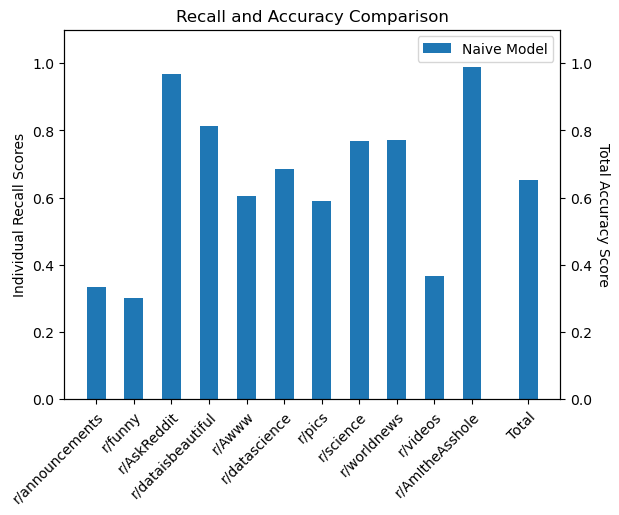

In [13]:

RF = Classifier('RF')
RF._train = _RandomForest_train
RF._predict = _RandomForest_predict

obj.add_vectorizer(Naive_BoW)
obj.add_feature_vectors('Naive BoW')
obj.add_classifier(RF)
obj.train_model('Naive Model', 'Naive BoW', 'RF',
                description="The Naive model using a full BoW vocab and RF with default parameters."
                )
obj.test_model('Naive Model')
obj.compare(['Naive Model'])

In [127]:
obj.full_data

,title,subreddit,subreddit_num
id,,,
t93ec3,This subreddit is closed for new posts and com...,announcements,3
pg006s,COVID denialism and policy clarifications,announcements,3
pbmy5y,"Debate, dissent, and protest on Reddit",announcements,3
nw2hs6,Sunsetting Secret Santa and Reddit Gifts,announcements,3
mi01fg,Second,announcements,3
...,...,...,...
10mvmxu,WIBTA if I planned and threw a St. Patty’s par...,AmItheAsshole,0
10mvlnr,AITA for lashing out at my parents?,AmItheAsshole,0
10mvlgl,AITA for not wanting to spend time with my wif...,AmItheAsshole,0


In [162]:
obj.ALL_FEATURES

,title,subreddit,subreddit_num,Aux: num_chars,Aux: num_caps,Aux: num_lower,Aux: num_emojis,BoC: W,BoC: b,BoC: ?,...,PoS: VBP,PoS: JJ,PoS: VB,PoS: VBG,PoS: SYM,PoS: NNPS,PoS: .,PoS: ),"PoS: ,",PoS: WRB
id,,,,,,,,,,,,,,,,,,,,,
t93ec3,this subreddit is closed for new posts and com...,announcements,3,160,4,125,0,0,1,0,...,0,2,2,0,0,0,2,0,3,0
pg006s,covid denialism and policy clarifications,announcements,3,41,5,32,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
pbmy5y,"debate, dissent, and protest on reddit",announcements,3,38,2,29,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0
nw2hs6,sunsetting secret santa and reddit gifts,announcements,3,40,5,30,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
mi01fg,second,announcements,3,6,1,5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10mvmxu,wibta if i planned and threw a st. patty’s par...,AmItheAsshole,0,115,8,84,0,1,0,1,...,0,1,1,0,0,0,1,0,0,0
10mvlnr,aita for lashing out at my parents?,AmItheAsshole,0,35,4,24,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
10mvlgl,aita for not wanting to spend time with my wif...,AmItheAsshole,0,65,4,48,0,0,1,1,...,0,0,1,1,0,0,1,0,0,0


In [166]:
obj.train_model.info()

AttributeError: 'function' object has no attribute 'info'

In [167]:
obj.Classifiers

{}

In [168]:
a = Classifier('test')

In [169]:
from sklearn.ensemble import RandomForestClassifier


def _RandomForest_train(X_train, Y_train):
    # Initialize the Random Forest model
    rf = RandomForestClassifier()
    # Train the model on the input data
    rf.fit(X_train, Y_train)
    # Output the trained model
    return rf


def _RandomForest_predict(title_vectors, model):
    # Make predictions on the input data
    predictions = model.predict(title_vectors)
    # Output the predictions as a pandas series
    return pd.Series(predictions)


In [188]:

RF = Classifier('RF')
RF._train = _RandomForest_train
RF._predict = _RandomForest_predict

obj.add_classifier(RF)

In [172]:
obj.X_train

id
10q4vr2    What do you find to be the most disrespectful ...
10l4k14                                  NOT gonna eat there
10onlbl    Very content cat. Loving the sun and ofcourse ...
10o8gas                            9 year old drifting a car
10oqsll                                          Watchmen 10
                                 ...                        
10nolvw    A module my project depended on to retrieve da...
10omphc                                      Today's visitor
10k860k    Transitioning from a Marketing Analyst Role to...
10q3cg9    What’s the most useless piece of information y...
10jwe43    As Cairo book fair opens, Israel expresses con...
Name: title, Length: 7568, dtype: object

In [173]:
df = obj.ALL_FEATURES[['Aux: num_chars', 'Aux: num_caps']]
df

,Aux: num_chars,Aux: num_caps
id,,
t93ec3,160,4
pg006s,41,5
pbmy5y,38,2
nw2hs6,40,5
mi01fg,6,1
...,...,...
10mvmxu,115,8
10mvlnr,35,4
10mvlgl,65,4


In [178]:
aux_features = obj.ALL_FEATURES.loc[:, list(obj.ALL_FEATURES.columns.str.startswith('Aux:'))]
aux_features

,Aux: num_chars,Aux: num_caps,Aux: num_lower,Aux: num_emojis
id,,,,
t93ec3,160,4,125,0
pg006s,41,5,32,0
pbmy5y,38,2,29,0
nw2hs6,40,5,30,0
mi01fg,6,1,5,0
...,...,...,...,...
10mvmxu,115,8,84,0
10mvlnr,35,4,24,0
10mvlgl,65,4,48,0


In [177]:
type(obj.ALL_FEATURES.columns.str.startswith('Aux:'))

numpy.ndarray

In [181]:
obj.full_data['subreddit'].loc[obj._train_index]

id
10q4vr2      AskReddit
10l4k14          funny
10onlbl           pics
10o8gas         videos
10oqsll         videos
              ...     
10nolvw    datascience
10omphc           pics
10k860k    datascience
10q3cg9      AskReddit
10jwe43      worldnews
Name: subreddit, Length: 7568, dtype: object

In [268]:
import pickle as pkl

pickleable_attrs = ['raw_data', 'full_data', 'subreddits', 'X_train', 'Y_train', 'X_test', 'Y_test', 'Feature_Vectors',  'Models_info', '_le', '_train_index', '_test_index', 'Predictions', 'Results', 'Cross_Validation_Results', 'Cross_Validation_Results_avg', 'Cross_Validation_Results_std', 'ErrorBars', 'ALL_FEATURES']
nonpickleable_attrs = ['Classifiers', 'Models']


def SAVE_obj(obj, path):
    # Create a dictionary of the object's attributes
    obj_dict = {}
    for attr in pickleable_attrs:
        obj_dict[attr] = obj.__dict__[attr]

    # Save the dictionary to a file
    with open(path, 'wb') as f:
        pkl.dump(obj_dict, f)

def UPDATE_obj(obj, path):
    #Run the other Notebook
    %run Classes.ipynb

    #Instantiate a new object and load the Reddit Data
    new_obj = Subreddit_Predictor()

    # Save the attributes of the old object to a dictionary
    obj_dict = {}
    for attr in pickleable_attrs:
        obj_dict[attr] = obj.__dict__[attr]
        new_obj.__dict__[attr] = obj.__dict__[attr]

    SAVE_obj(new_obj, path)

    for attr in nonpickleable_attrs:
        new_obj.__dict__[attr] = obj.__dict__[attr]

    return new_obj

def LOAD_obj(path):
    # Load the dictionary from a file
    with open(path, 'rb') as f:
        obj_dict = pkl.load(f)

    # Instantiate a new object
    new_obj = Subreddit_Predictor()

    # Add the attributes from the dictionary to the new object
    for attr, value in obj_dict.items():
        new_obj.__dict__[attr] = value

    return new_obj


In [269]:
new_obj = UPDATE_obj(obj, path)

new_obj.new_train_model('test',  list(aux_features) + ['BoW: aita', 'BoW: wibta', 'BoC: ?'], 'RF')
new_obj.new_test_model('test')

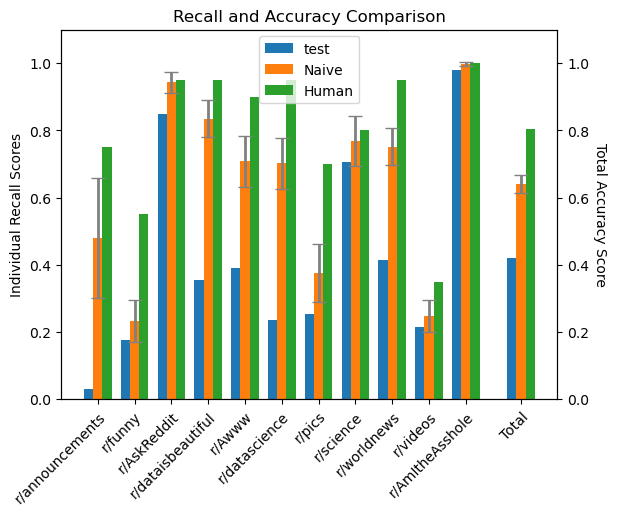

In [270]:
new_obj.compare(['test', 'Naive', 'Human'], error_bars=True)

In [238]:
'BoW: aita' in obj.ALL_FEATURES.columns

True

In [186]:
obj.Models_info['RF'] = {'vectorizerName': 'aux only', 'classifierName': classifierName,
                         'description': description}

KeyError: 'RF'

In [227]:
obj.ALL_FEATURES.loc[:, list(aux_features)]

,Aux: num_chars,Aux: num_caps,Aux: num_lower,Aux: num_emojis
id,,,,
t93ec3,160,4,125,0
pg006s,41,5,32,0
pbmy5y,38,2,29,0
nw2hs6,40,5,30,0
mi01fg,6,1,5,0
...,...,...,...,...
10mvmxu,115,8,84,0
10mvlnr,35,4,24,0
10mvlgl,65,4,48,0


In [223]:
list

['raw_data',
 'full_data',
 'subreddits',
 'Vectorizers',
 'Feature_Vectors',
 'Classifiers',
 'Models',
 'Models_info',
 '_le',
 'X_train',
 'X_test',
 'Y_train',
 'Y_test',
 '_train_index',
 '_test_index',
 'Predictions',
 'Results',
 'Cross_Validation_Results',
 'Cross_Validation_Results_avg',
 'Cross_Validation_Results_std',
 'ErrorBars',
 'ALL_FEATURES',
 '__module__',
 '__init__',
 'add_data',
 'ready_data',
 '_preclean_data',
 'add_vectorizer',
 'add_feature_vectors',
 'add_classifier',
 'train_model',
 'test_model',
 'validate',
 'predict',
 'compare',
 '__dict__',
 '__weakref__',
 '__doc__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [226]:
type(list)

type

In [225]:
del list

In [271]:
obj_dict

{'raw_data':            id                                              title  \
 0      t93ec3  This subreddit is closed for new posts and com...   
 1      pg006s          COVID denialism and policy clarifications   
 2      pbmy5y             Debate, dissent, and protest on Reddit   
 3      nw2hs6           Sunsetting Secret Santa and Reddit Gifts   
 4      mi01fg                                             Second   
 ...       ...                                                ...   
 9456  10mvmxu  WIBTA if I planned and threw a St. Patty’s par...   
 9457  10mvlnr                AITA for lashing out at my parents?   
 9458  10mvlgl  AITA for not wanting to spend time with my wif...   
 9459  10mvix4  WIBTA if I cancelled a vacation weekend becaus...   
 9460  10mvfki      AITA for not taking in my son and his family.   
 
           subreddit  
 0     announcements  
 1     announcements  
 2     announcements  
 3     announcements  
 4     announcements  
 ...             ...

In [272]:
a = obj_dict['hi']

KeyError: 'hi'